In [6]:
# import mysql.connector
import pandas as pd
import os
import sys
import numpy as np
pd.set_option('display.max_columns', 90)
from pathlib import Path, PureWindowsPath

import importlib
sys.path.append('/home/apaulson/repos/data-proc/')
import plate_maps as pm
%config Completer.use_jedi=False

# steps to lookup plate information

## StepWise

### Lookup collection id by name

In [2]:
coll = 'Otava'

In [3]:
cnx = mysql.connector.connect(user=os.environ['mysql_user'], password=os.environ['mysql_pwd'],
                              host=os.environ['mysql_host'],
                              database=os.environ['mysql_database'])

query=f"""
select * from INV_COLLECTION where ICO_NAME like '%{coll}%';
"""
coll=pd.read_sql(query, cnx)

cnx.close()

/home/apaulson/miniconda3/envs/new-pandas/lib/python3.10/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
coll

,ICO_ID,ICO_PARENT_ID,ICO_NAME,ICO_COMMON_NAME,ICO_GROUP_TYPE,ICO_ICT_ID,ICO_IV_ID,ICO_PLATE_COUNT,ICO_LOT_COUNT,ICO_DESC,ICO_DATE_OBTAINED,ICO_HP_ID,ICO_SCREENING_CENTER,ICO_IS_PUBLIC,ICO_STATUS_ID,ICO_STATUS_NOTES,ICO_INS_BY,ICO_INS_DATE
0,227,None,Otava PARP1 Targeted,None,Plate,PARP1,29,6,456,Otava PARP1 targeted library,None,None,SMDC,0,1,private for now?,540,2022-05-03 18:53:00


### Lookup plates in collection

In [5]:
ico_id=coll.ICO_ID[0]
ico_id

227

In [6]:
cnx = mysql.connector.connect(user=os.environ['mysql_user'], password=os.environ['mysql_pwd'],
                              host=os.environ['mysql_host'],
                              database=os.environ['mysql_database'])
query = f"""
select IP_ID, IP_GRID_NUM, IP_BARCODE, IP_SOURCE_ID, IP_ICO_ID, ICO_NAME, IPT_ID, IPT_SDESC, IPT_LDESC from INV_PLATE inner join 
INV_PLATE_TYPE on IP_IPT_ID=IPT_ID inner join
INV_COLLECTION on IP_ICO_ID=ICO_ID
where IP_ICO_ID = {ico_id}
"""

plates=pd.read_sql(query, cnx)

cnx.close()

/home/apaulson/miniconda3/envs/new-pandas/lib/python3.10/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
plates

,IP_ID,IP_GRID_NUM,IP_BARCODE,IP_SOURCE_ID,IP_ICO_ID,ICO_NAME,IPT_ID,IPT_SDESC,IPT_LDESC
0,26969,OTPARP1,OTPARP1-MA01,None,227,Otava PARP1 Targeted,1,MA,Master Plate
1,26970,OTPARP2,OTPARP2-MA01,None,227,Otava PARP1 Targeted,1,MA,Master Plate
2,26971,OTPARP3,OTPARP3-MA01,None,227,Otava PARP1 Targeted,1,MA,Master Plate
3,26972,OTPARP4,OTPARP4-MA01,None,227,Otava PARP1 Targeted,1,MA,Master Plate
4,26973,OTPARP5,OTPARP5-MA01,None,227,Otava PARP1 Targeted,1,MA,Master Plate
5,26974,OTPARP6,OTPARP6-MA01,None,227,Otava PARP1 Targeted,1,MA,Master Plate
6,27064,OTPARP1234,OTPARP1234-Eco1,None,227,Otava PARP1 Targeted,1,MA,Master Plate
7,27065,OTPARP56,OTPARP56-Eco2,None,227,Otava PARP1 Targeted,1,MA,Master Plate


### Lookup plate well locations by plate id

In [13]:
plate = plates[plates.IP_GRID_NUM=='OTPARP1234'].IP_ID.iloc[0]
plate

27064

In [14]:
cnx = mysql.connector.connect(user=os.environ['mysql_user'], password=os.environ['mysql_pwd'],
                              host=os.environ['mysql_host'],
                              database=os.environ['mysql_database'])

query=f"""
select * from INV_WELL where IW_IP_ID = {plate};
"""

wells=pd.read_sql(query, cnx)

cnx.close()

In [19]:
wells.head(2)

,IW_ID,IW_SOURCE_ID,IW_IP_ID,IW_BARCODE,IW_WELL_INDEX,IW_COORDINATES,IW_ICL_ID,IW_VOL_UL,IW_CONC_UM,IW_FINAL_CONC_NM,IW_DILUTION_FACTOR,IW_FREEZETHAW,IW_INS_BY,IW_INS_DATE,IW_CONTAM,IW_NOTES
0,8302863,None,27064,None,1,A01,NaN,50.0,10000,None,None,None,540,2022-06-01 17:08:15,0,None
1,8302864,None,27064,None,2,A02,NaN,50.0,10000,None,None,None,540,2022-06-01 17:08:15,0,None


## Straight from barcode

### Lookup plate info by barcode

In [11]:
barcode='OTPARP1234-Eco1'

In [13]:
importlib.reload(pm)
df=pm.make_platemaps_from_barcode(barcode=barcode, outdir=None)

/home/apaulson/miniconda3/envs/new-pandas/lib/python3.10/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [14]:
df

,IW_COORDINATES,Vendor_Alias,SMDC_ID,Lot_Num,Conc_nM,Row,Col,Plate
0,A01,None,NaN,NaN,None,A,1,OTPARP1234-Eco1
1,A02,None,NaN,NaN,None,A,2,OTPARP1234-Eco1
2,A03,P2630892,80264.0,2.0,None,A,3,OTPARP1234-Eco1
3,A04,P1361760,1083999.0,1.0,None,A,4,OTPARP1234-Eco1
4,A05,P7213330574,1084005.0,1.0,None,A,5,OTPARP1234-Eco1
...,...,...,...,...,...,...,...,...
379,P20,P7119983311,67366.0,2.0,None,P,20,OTPARP1234-Eco1
380,P21,P2196427,1084220.0,1.0,None,P,21,OTPARP1234-Eco1
381,P22,P4355674,1084227.0,1.0,None,P,22,OTPARP1234-Eco1
382,P23,None,NaN,NaN,None,P,23,OTPARP1234-Eco1


# Draw plate maps from DR plate map style file

In [75]:
path1 = r"Z:\SMDC\Screens\2022-12_Project_302_SARS_MERS_Strateos_ATOM\2314_SARS-CoV2_3CLPro\toload\20221212\spectrophotometry_d13z564uatht8t.csv"
path2 = r"Z:\SMDC\Screens\2022-12_Project_302_SARS_MERS_Strateos_ATOM\2315_MERS_3CLPro\toload\20221212\spectrophotometry_d13z54adq78ju2.csv"

path3 = r"Z:\SMDC\Screens\2022-12_Project_302_SARS_MERS_Strateos_ATOM\2314_SARS-CoV2_3CLPro\toload\20221212\nodiv_spectrophotometry_d13z566ussvgrh.csv"
path4 = r"Z:\SMDC\Screens\2022-12_Project_302_SARS_MERS_Strateos_ATOM\2315_MERS_3CLPro\toload\20221212\nodiv_spectrophotometry_d13z54getmeqkp.csv"

dfs=[]
vmin=0
vmax=78915
for path in [path1,path2,path3,path4]:
    path=path.replace("\\","/").replace('Z:','/mnt/z')
    print(path)
    # df=pd.read_excel(path)
    df=pd.read_csv(path)
    df.head(2)
    if df.Value.max()>vmax:
        vmax=df.Value.max()
    if df.Value.min()<vmin:
        vmin=df.Value.min()
    dfs.append(df)

/mnt/z/SMDC/Screens/2022-12_Project_302_SARS_MERS_Strateos_ATOM/2314_SARS-CoV2_3CLPro/toload/20221212/spectrophotometry_d13z564uatht8t.csv
/mnt/z/SMDC/Screens/2022-12_Project_302_SARS_MERS_Strateos_ATOM/2315_MERS_3CLPro/toload/20221212/spectrophotometry_d13z54adq78ju2.csv
/mnt/z/SMDC/Screens/2022-12_Project_302_SARS_MERS_Strateos_ATOM/2314_SARS-CoV2_3CLPro/toload/20221212/nodiv_spectrophotometry_d13z566ussvgrh.csv
/mnt/z/SMDC/Screens/2022-12_Project_302_SARS_MERS_Strateos_ATOM/2315_MERS_3CLPro/toload/20221212/nodiv_spectrophotometry_d13z54getmeqkp.csv


In [76]:
vmin,vmax

(0, 78915)

In [77]:
for df in dfs:
    print(df.cp_0_smiles.value_counts(dropna=False)[0:4], '\n')

Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)C(=O)N[C@H](/C=C/C(=O)OCc2ccccc2)C[C@@H]2CCNC2=O)C(C)C)no1    32
NaN                                                                                                                32
CCCc1c(OCCCCC(C)(C)C(=O)O)ccc(C(C)=O)c1O                                                                            1
COc1ccc(NC(=O)CSc2nccn2C)cc1                                                                                        1
Name: cp_0_smiles, dtype: int64 

Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)C(=O)N[C@H](/C=C/C(=O)OCc2ccccc2)C[C@@H]2CCNC2=O)C(C)C)no1    32
NaN                                                                                                                32
CCCc1c(OCCCCC(C)(C)C(=O)O)ccc(C(C)=O)c1O                                                                            1
COc1ccc(NC(=O)CSc2nccn2C)cc1                                                                                        1
Name: cp_0_smiles, dty

In [78]:
# df.columns=['SMDC_ID', 'smiles', 'Lot', 'Volume (uL)', 'Conc_mM',
#        'Source plate', 'Source well', '96 Well Plated Volume (uL)', 'Destination plate',
#        'Destination well', '384 Well Plated Volume (uL)', 'row_96', 'col_96',
#        'row_384', 'col_384']
# df.Conc_mM.unique()

In [79]:
# df=df[~df.Conc_mM.isna()]
# df["[compound] uM"]=df.Conc_mM.str[0:2].astype(int)*1000
# df=df[['SMDC_ID', 'Lot', 'Source plate', 'Source well', 'Destination plate', 'Destination well', '[compound] uM']]

In [80]:
# df.to_excel('/mnt/z/SMDC/All_Compounds/Compound Library (SMDC Monophores)/SMDC-MPHORE-384-MA-07.xlsx', index=False)

In [87]:
importlib.reload(pm)

<module 'plate_maps' from '/mnt/c/Users/akpau/Repos/data_proc/plate_maps.py'>

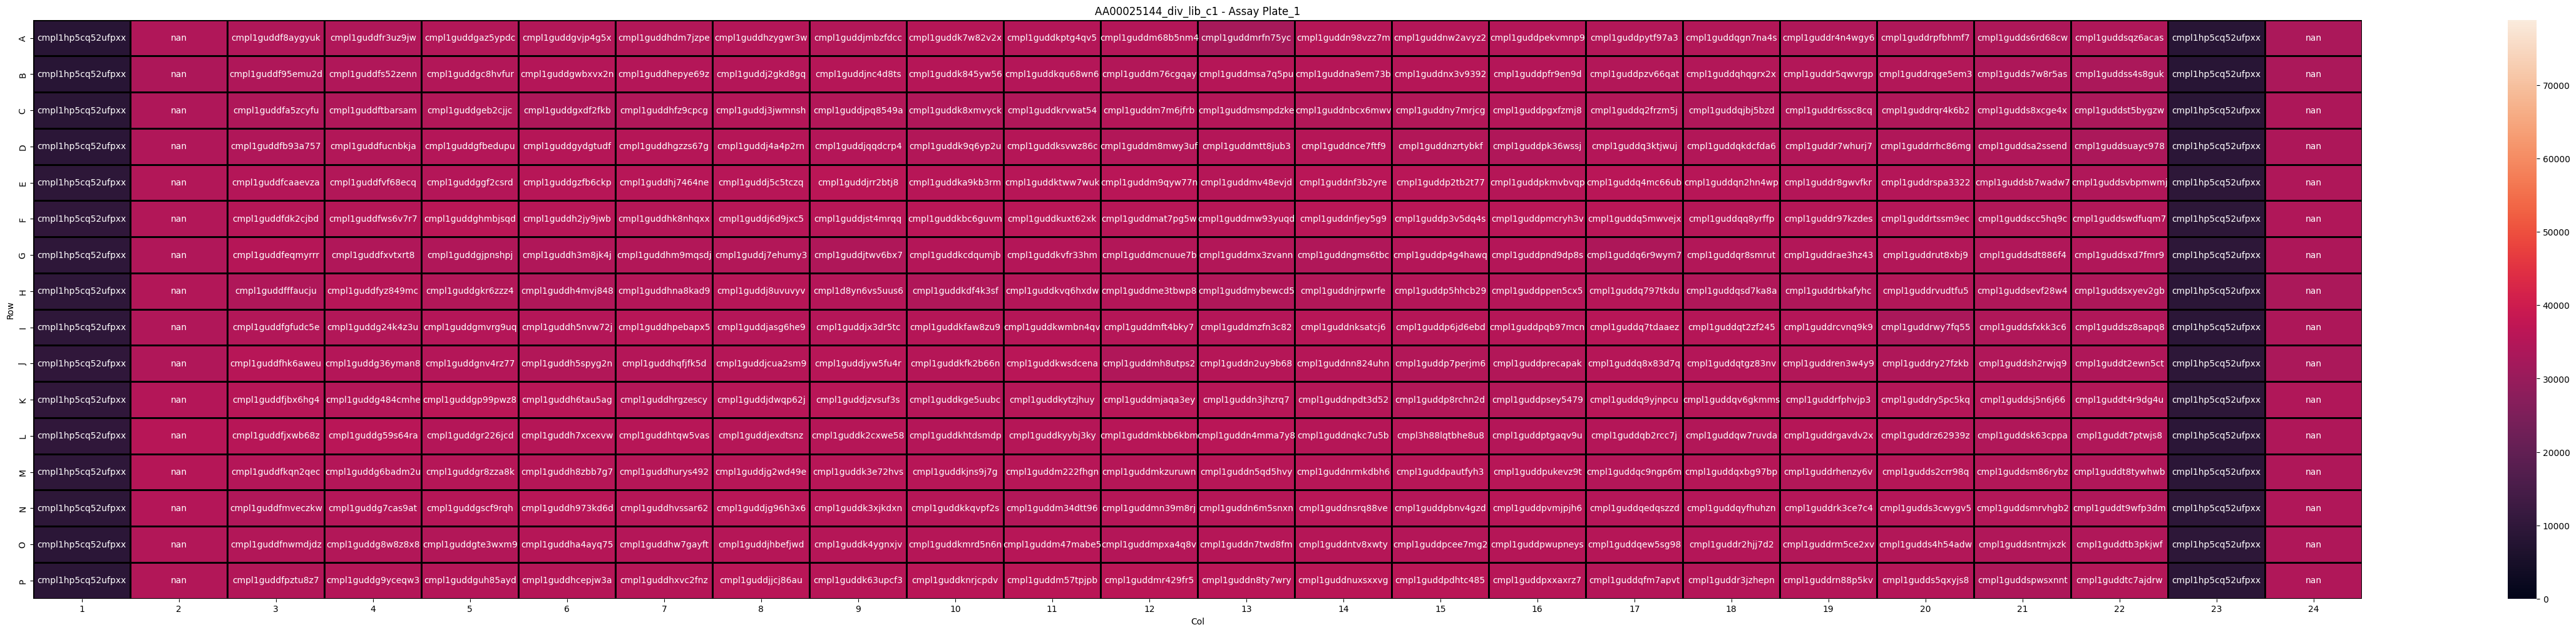

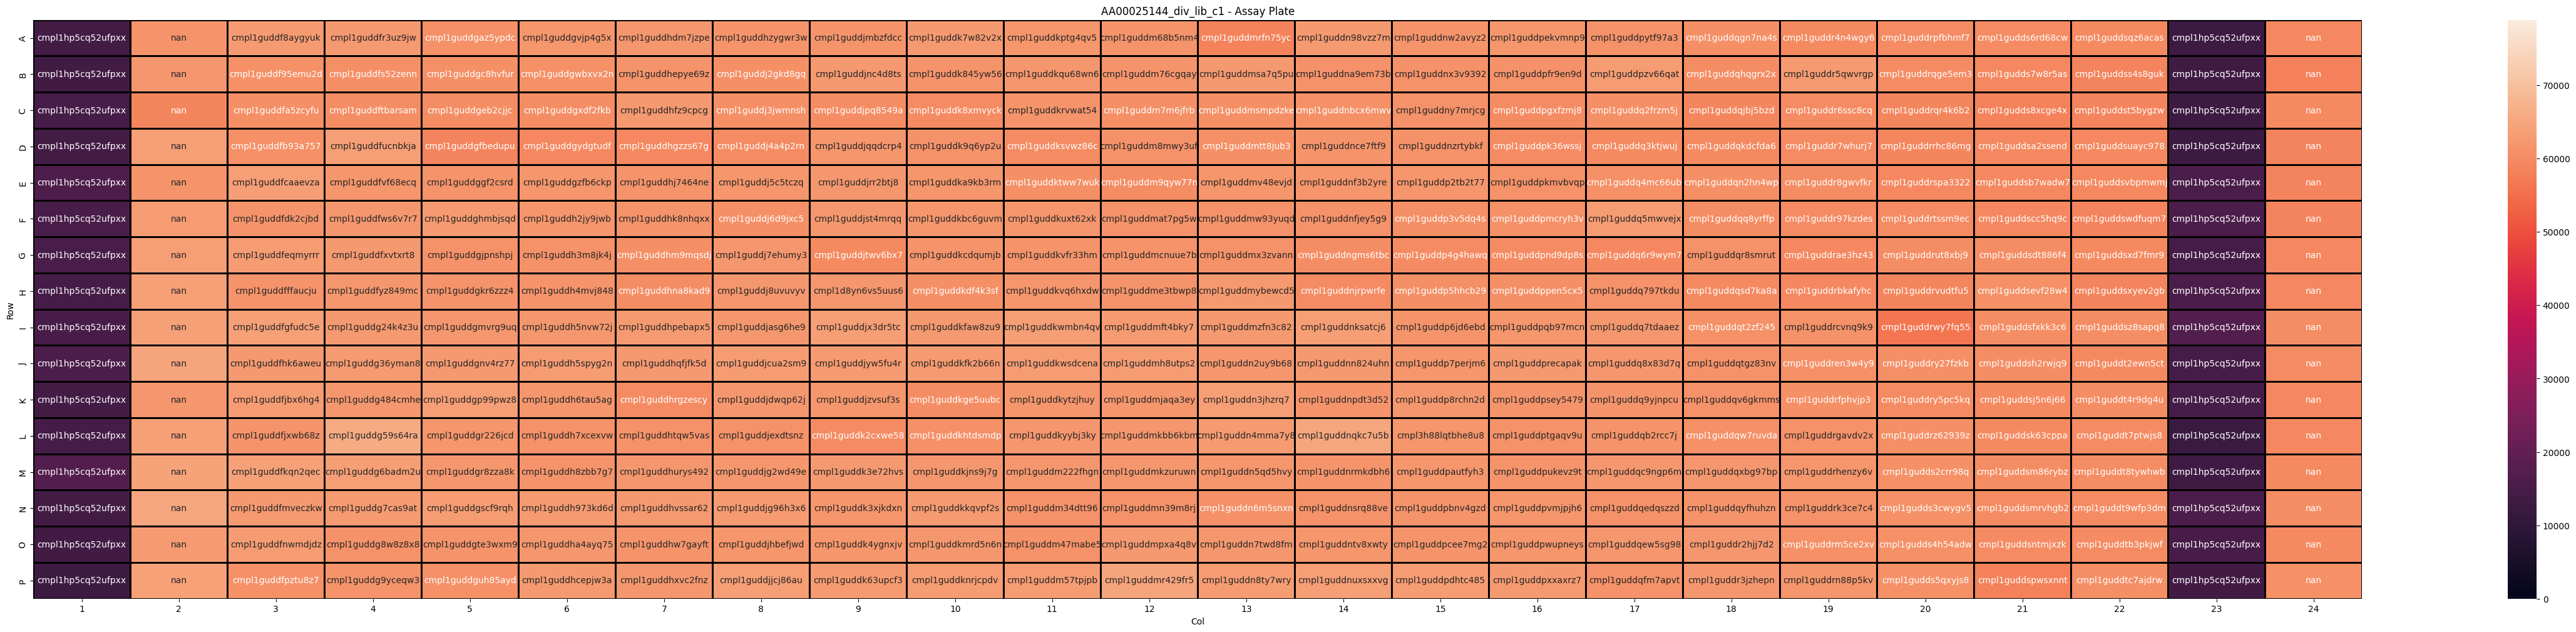

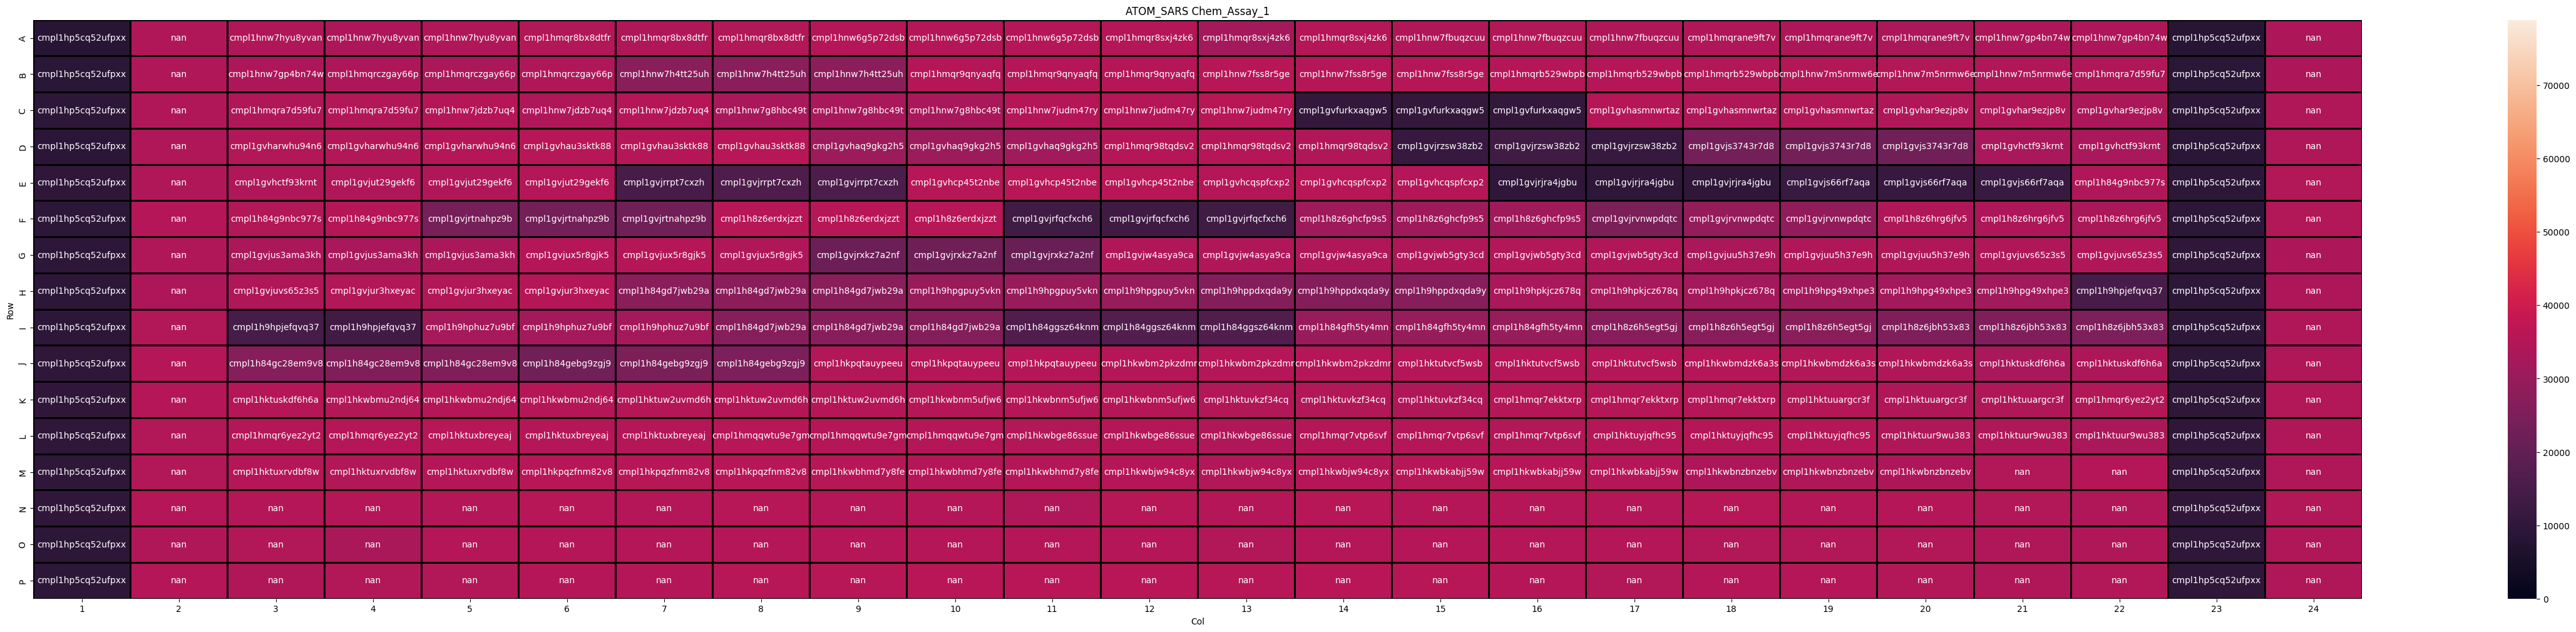

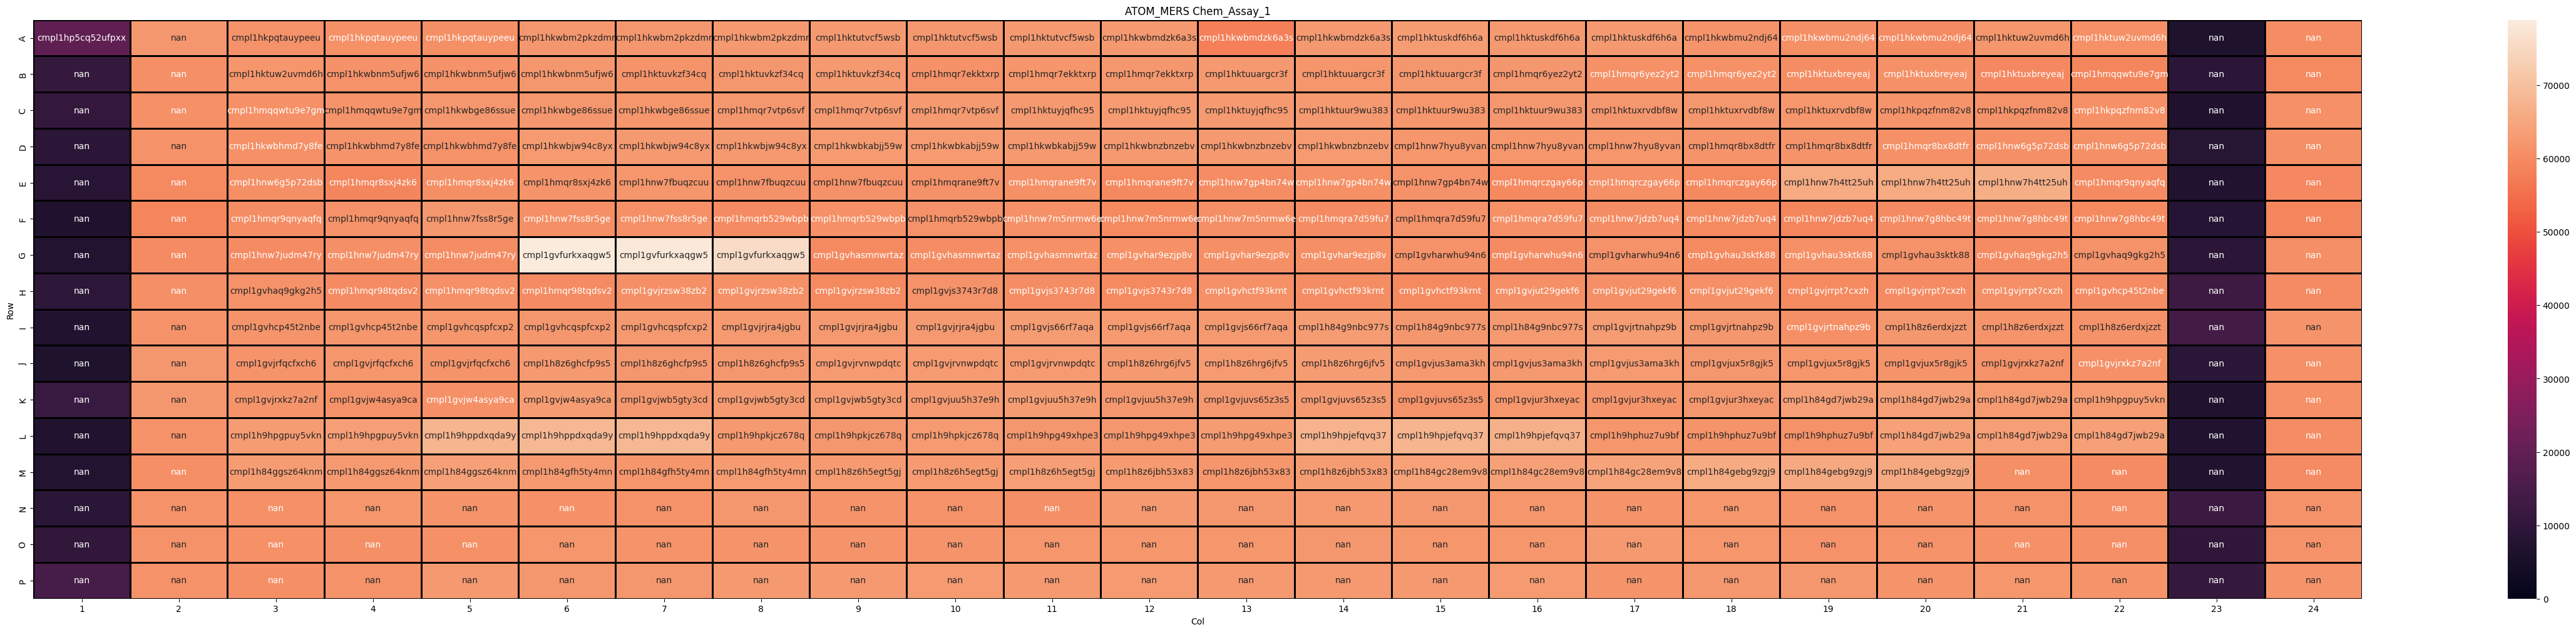

In [90]:
for df in dfs:
    barcode=df['Refname'].iloc[0]
    pm.draw_plate_heatmap(df=df, wells='Well', labels='cp_0_compound_link_id',
                          values='Value', barcode=barcode, width=60, vmin=vmin, vmax=vmax)

# Draw Plate Map & overlaps from barcodes

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

In [27]:
importlib.reload(pm)
plates=[
"05077CB-ECO1"
]


dfs=[]
ids=[]
for barcode in plates:
    tmp=pm.make_platemaps_from_barcode(barcode=barcode, 
                                       # outdir="./John_Gordan",
                                       outdir=None
                                      )
    tmp=tmp[~tmp.SMDC_ID.isna()]
    dfs.append(tmp)
    smdc=set(tmp.SMDC_ID.unique())
    ids.append(smdc)
pl=pd.concat(dfs)
pl=pl.reset_index(drop=True)

In [28]:
pl.SMDC_ID.nunique()

320

In [29]:
pl.SMDC_ID=pl.SMDC_ID.astype(int)
pl.head()

,Well,Vendor_Alias,SMDC_ID,Common_Name,Lot_Num,Conc_uM,Conc_nM,SMILES,Row,Col,Plate
0,A03,9120059,1000761,NaN,1.0,10000.0,None,COc1ccc(NC(=O)c2cccc(NS(=O)(=O)C)c2C)c(OC)c1,A,3,05077CB-ECO1
1,A04,9121487,1000837,NaN,1.0,10000.0,None,CCOC(=O)N1CCN(CC(O)COC2CCCC2C)CC1,A,4,05077CB-ECO1
2,A05,9120162,1000760,NaN,1.0,10000.0,None,COc1ccc(OCC(=O)N)cc1S(=O)(=O)N2CCCC2,A,5,05077CB-ECO1
3,A06,9121629,1000836,NaN,1.0,10000.0,None,CCC(=O)Nc1nc(cs1)c2cccc(NC(=O)c3cccnc3)c2,A,6,05077CB-ECO1
4,A07,9120237,1000759,NaN,1.0,10000.0,None,COc1cc(NC(=O)C23CC4CC(CC(C4)C2)C3)ccc1OCC(=O)N...,A,7,05077CB-ECO1


In [30]:
# pl.to_csv('NCI_Natural_Products_Library.csv')

In [31]:
idcount=0
for idset in ids:
    print(len(idset))
    idcount+=len(idset)

320


In [32]:
idcount

320

In [33]:
pl.shape

(320, 11)

In [34]:
pl.SMILES.nunique()

320

In [35]:
pd.DataFrame(pl.SMDC_ID.value_counts()).head(10)

,count
SMDC_ID,
1000761,1
1000837,1
1000714,1
1000790,1
1000713,1
1000789,1
1000712,1
1000788,1
1000711,1


In [36]:
# pl1=pl.drop_duplicates(subset='SMILES',keep='first')
# plt=pl[~pl.index.isin(pl1.index)]
# pl2=plt.drop_duplicates(subset='SMILES',keep='first')
# pl3=plt[~plt.index.isin(pl2.index)]
# pl3

In [37]:
# pl1.to_csv('monophores_for_avidd_1.csv')
# pl2.to_csv('monophores_for_avidd_2.csv')
# pl3.to_csv('monophores_for_avidd_3.csv')

In [38]:
from supervenn import supervenn as spv

ModuleNotFoundError: No module named 'supervenn'

In [39]:
# fig, ax = plt.subplots(1, figsize=(30,5))
# spv(ids, set_annotations=plates, ax=ax, side_plots=False, min_width_for_annotation=10)
pm.draw_plate_heatmap?

Signature:
pm.draw_plate_heatmap(
    barcode='OTPARP1234-Eco1',
    df=None,
    wells='Well',
    values='SMDC_ID',
    labels='SMDC_ID',
    center=None,
    vmin=None,
    vmax=None,
    width=25,
    outdir=None,
)
Docstring:
Draw a heatmap of the plate using a platemap excel style file as your df
Args:
    df (Pandas DataFrame): data to pivot into heatmap; optional if barcode is provided.
    row_col (str): name of column containing row values
    col_col (str): name of column containing column values
    values (str): name of column containing heatmap values (floats)
    labels (str): name of column containing heatmap label values (strings)
    barcode (str): name of plate or barcode to look up
Returns:
    None
Side effects:
    Draws a plate heatmap with values as labels
File:      ~/repos/data-proc/plate_maps.py
Type:      function

05077CB-ECO1


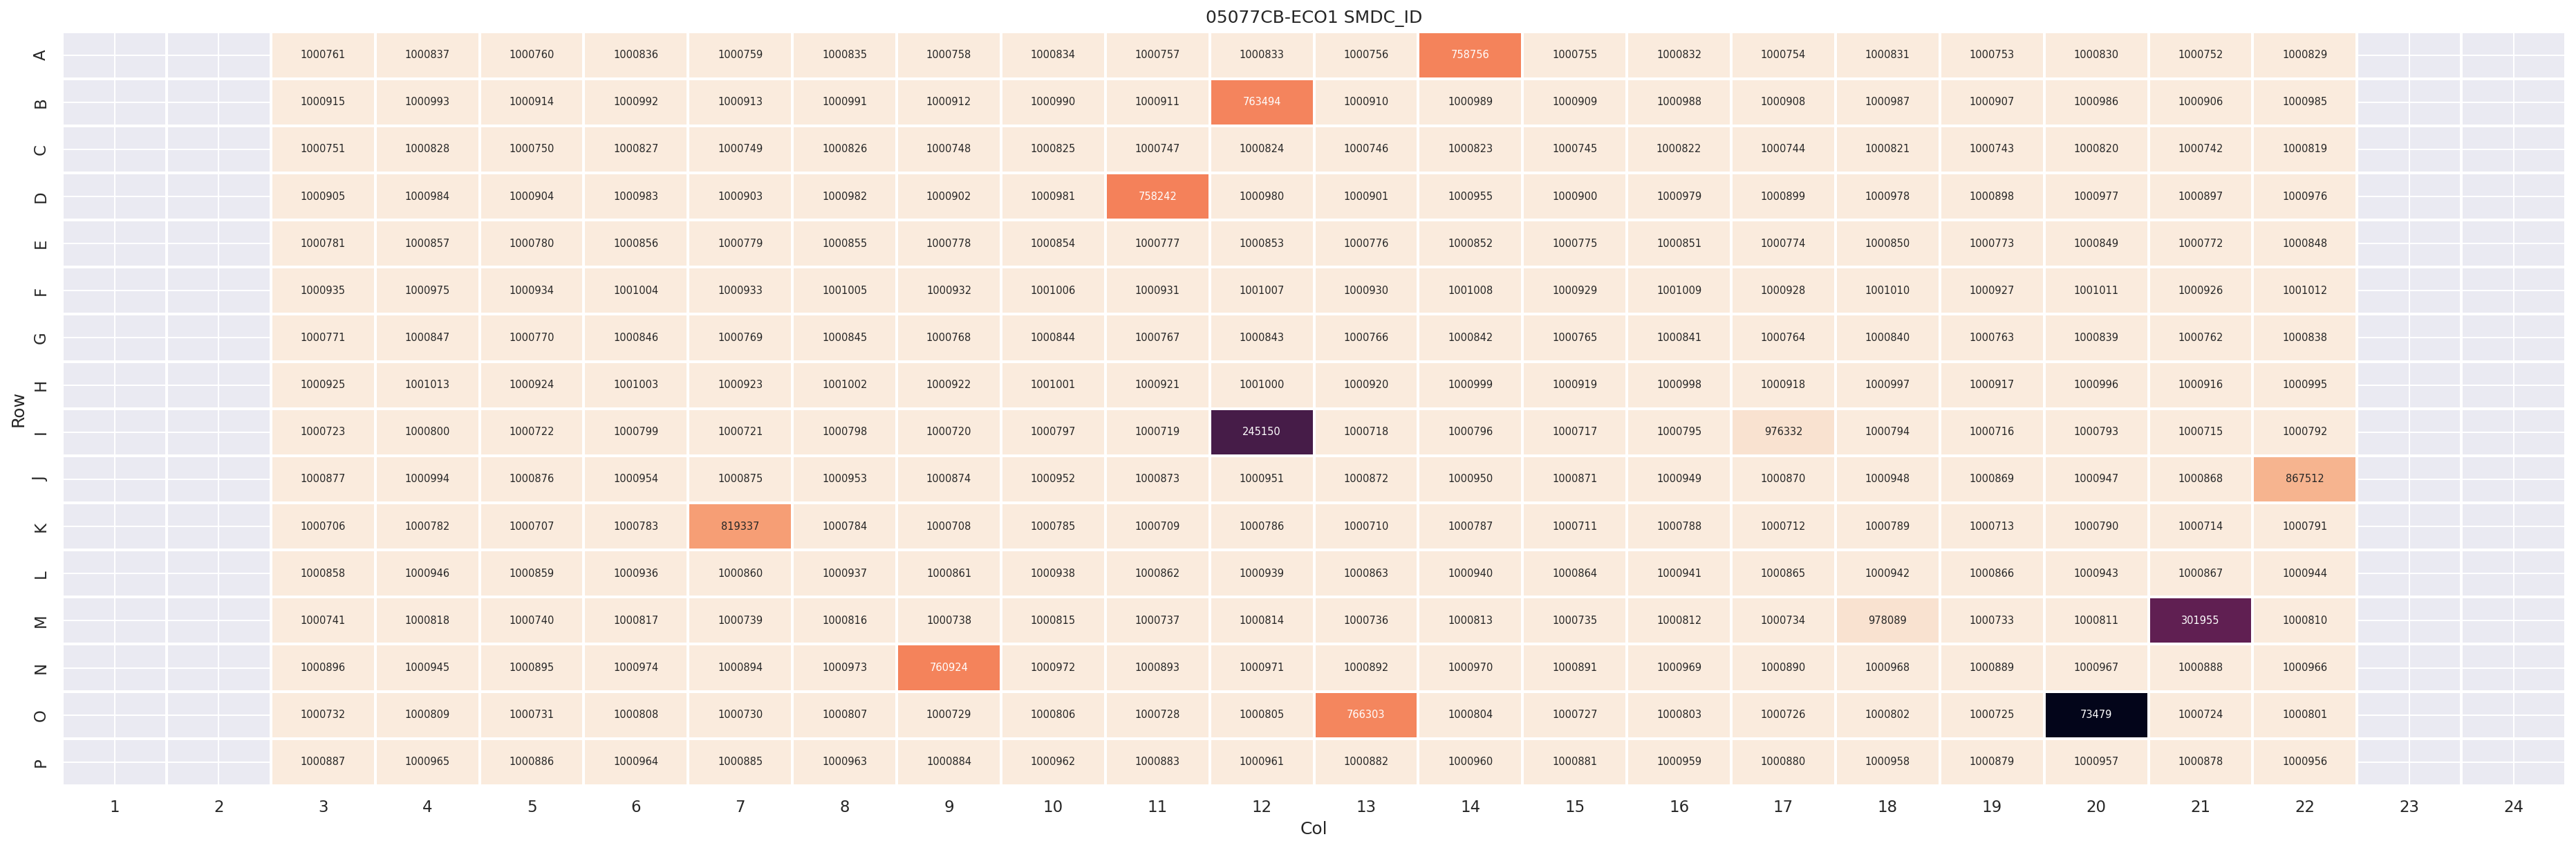

In [40]:
importlib.reload(pm)
for barcode in plates:
    print(barcode)
    pm.draw_plate_heatmap(barcode=barcode, outdir=None)

In [15]:
platemaps=[]
for pl in plates:
    tmp=pm.make_platemaps_from_barcode(pl)
    display(tmp.head())

,Well,Vendor_Alias,SMDC_ID,Common_Name,Lot_Num,Conc_uM,Conc_nM,SMILES,Row,Col,Plate
0,A01,NaN,NaN,NaN,NaN,NaN,None,None,A,1,ML00106741-PT01
1,A02,NaN,NaN,NaN,NaN,NaN,None,None,A,2,ML00106741-PT01
2,A03,SAM004887053,967135.0,"Carbomycin, Carbomycin (Magnamycin A)",1.0,10000.0,None,COC1C(CC(=O)OC(C)CC2OC2\C=C\C(=O)C(C)CC(CC=O)C...,A,3,ML00106741-PT01
8,A04,SAM004887048,255892.0,Dl-canadine,5.0,10000.0,None,COc1ccc2CC3N(CCc4cc5OCOc5cc34)Cc2c1OC,A,4,ML00106741-PT01
14,A05,SAM004887033,967136.0,MK-53,1.0,10000.0,None,CCC(C)(O)C(=O)OC1C2C(C)C(O)C3(O)OCC24C(CC5C(=C...,A,5,ML00106741-PT01


,Well,Vendor_Alias,SMDC_ID,Common_Name,Lot_Num,Conc_uM,Conc_nM,SMILES,Row,Col,Plate
0,A01,NaN,NaN,NaN,NaN,NaN,None,None,A,1,ML00089135-PT01
1,A02,NaN,NaN,NaN,NaN,NaN,None,None,A,2,ML00089135-PT01
2,A03,SAM003848231,874149.0,NaN,1.0,10000.0,None,CC(C)CC(=O)OC1C(Oc2cc3OC(=O)C=Cc3cc12)C(C)(C)O...,A,3,ML00089135-PT01
6,A04,SAM003848276,874165.0,NaN,1.0,10000.0,None,CC(=O)OC(C)(C)\C=C\C(=O)C(C)(O)C1C(O)CC2(C)C3C...,A,4,ML00089135-PT01
10,A05,SAM003848232,874181.0,NaN,1.0,10000.0,None,CCC(C)CC(=O)OC1CC(CC2C(=C)CCCC12C)C(=C)C(=O)O,A,5,ML00089135-PT01


,Well,Vendor_Alias,SMDC_ID,Common_Name,Lot_Num,Conc_uM,Conc_nM,SMILES,Row,Col,Plate
0,A01,NaN,NaN,NaN,NaN,NaN,None,None,A,1,ML00089136-PT01
1,A02,NaN,NaN,NaN,NaN,NaN,None,None,A,2,ML00089136-PT01
2,A03,SAM003848688,874468.0,NaN,1.0,10000.0,None,CC1=CC(=O)[C@@H](O)[C@]2(C)C1C[C@H]3OC(=O)[C@H...,A,3,ML00089136-PT01
7,A04,SAM003848380,874484.0,NaN,1.0,10000.0,None,CC1CCC2C(C)(C)C(O)C(O)CC2(C)C13Cc4c(O)cc(CO)c(...,A,4,ML00089136-PT01
12,A05,SAM003848603,874500.0,NaN,1.0,10000.0,None,COC1OC(OC)C(O)(CCC2(C)C(C)CCC3(C)C2CC(O)C(O)C3...,A,5,ML00089136-PT01


,Well,Vendor_Alias,SMDC_ID,Common_Name,Lot_Num,Conc_uM,Conc_nM,SMILES,Row,Col,Plate
0,A01,NaN,NaN,NaN,NaN,NaN,None,None,A,1,ML00089137-PT01
1,A02,NaN,NaN,NaN,NaN,NaN,None,None,A,2,ML00089137-PT01
2,A03,SAM003848681,874140.0,NaN,2.0,10000.0,None,C\C=C/C(=C/[C@H](C)C(=O)C[C@H](O)CC1CC(=O)NC(=...,A,3,ML00089137-PT01
6,A04,NaN,NaN,NaN,NaN,NaN,None,None,A,4,ML00089137-PT01
7,A05,NaN,NaN,NaN,NaN,NaN,None,None,A,5,ML00089137-PT01


,Well,Vendor_Alias,SMDC_ID,Common_Name,Lot_Num,Conc_uM,Conc_nM,SMILES,Row,Col,Plate
0,A01,NaN,NaN,NaN,NaN,NaN,None,None,A,1,ML00089160-PT01
1,A02,NaN,NaN,NaN,NaN,NaN,None,None,A,2,ML00089160-PT01
2,A03,SAM003895668,873974.0,NaN,1.0,10000.0,None,COc1ccc(cc1OC)C2OCC3(O)C2COC3c4ccc(OC)c(OC)c4,A,3,ML00089160-PT01
8,A04,SAM003895666,873975.0,NaN,1.0,10000.0,None,CC1(C)CC[C@]2(CC[C@@]3(C)C(=CCC4[C@]5(C)C[C@@H...,A,4,ML00089160-PT01
13,A05,SAM003895675,873976.0,NaN,1.0,10000.0,None,COC1C(O)C(C)OC(OC2C(O)C(O)[C@H](O[C@@H]3CC4CCC...,A,5,ML00089160-PT01


,Well,Vendor_Alias,SMDC_ID,Common_Name,Lot_Num,Conc_uM,Conc_nM,SMILES,Row,Col,Plate
0,A01,NaN,NaN,NaN,NaN,NaN,None,None,A,1,ML00089167-PT01
1,A02,NaN,NaN,NaN,NaN,NaN,None,None,A,2,ML00089167-PT01
4,A03,SAM003872773,874073.0,Pladienolide B,1.0,10000.0,None,CC[C@H](O)[C@@H](C)[C@H]1O[C@@H]1C[C@H](C)\C=C...,A,3,ML00089167-PT01
10,A04,SAM003872753,874074.0,Lachnone A,1.0,10000.0,None,CC1=C(O)C(=O)c2c(O)cc(C)cc2O1,A,4,ML00089167-PT01
17,A05,SAM003872746,874075.0,Mahanimbine,1.0,10000.0,None,CC(=CCC[C@]1(C)Oc2c(C)cc3c4ccccc4[nH]c3c2C=C1)C,A,5,ML00089167-PT01


In [13]:
tmp.SMDC_ID.nunique()

320

# Create DR plate map files for data upload

In [5]:
infile="/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/20230913_0915_ARAF_BRAF_P59_P60.xlsx"
infile=os.path.join("/mnt/mac/",infile)
print(infile)

outdir="/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella"
outdir=os.path.join("/mnt/mac/",outdir)
print(outdir)

users=[("Amanda","Paulson"),("Markella", "Konstantinidou")]

/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/20230913_0915_ARAF_BRAF_P59_P60.xlsx
/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella


In [ ]:
# %debug
importlib.reload(pm)
pm.make_dr_platemaps_and_folders(infile=infile, users=users, basedir=outdir, 
                                 dose_response=True)

In [9]:
# %debug

## ID duplicate source plates

In [346]:
%%time

aids=['2413','2415','2417']

# find directories by aid
adirs=[x for x in os.listdir(outdir) if x.startswith(tuple(aids))]

# get files
drfiles=[]
for adir in adirs:
    adir=os.path.join(outdir,adir)
    files=[os.path.join(root,f) for root,_,fn in os.walk(adir) for f in fn if f.endswith('DR_plate.xlsx')]
    drfiles.extend(files)
dups=pd.DataFrame([], columns=['SMDC_ID', 'Source plate','Plate'])

# find dupes
for file in drfiles:
    tmp=pd.read_excel(file, engine='openpyxl')
    tmp=tmp[['SMDC_ID','Source plate']].drop_duplicates()
    tmp=tmp[tmp.SMDC_ID.duplicated(keep=False)]
    tmp['Plate']=file
    dups=pd.concat([dups, tmp])

# reorder and save
dups=dups.pivot_table(index=['Plate','SMDC_ID'], values='Source plate', aggfunc=lambda x: list(x))
dups=dups.reset_index()
dups.to_csv('assay_source_plate.csv')
dups

CPU times: user 474 ms, sys: 27.6 ms, total: 502 ms
Wall time: 16.5 s


,Plate,SMDC_ID,Source plate
0,/mnt/z/SMDC/Screens/2022_users_temp/Holly/2413...,917562.0,"[SMDC-MPHORE-96-MA-10, SMDC-MPHORE-96-MA-13]"
1,/mnt/z/SMDC/Screens/2022_users_temp/Holly/2413...,917562.0,"[SMDC-MPHORE-96-MA-10, SMDC-MPHORE-96-MA-13]"
2,/mnt/z/SMDC/Screens/2022_users_temp/Holly/2415...,917562.0,"[SMDC-MPHORE-96-MA-10, SMDC-MPHORE-96-MA-13]"
3,/mnt/z/SMDC/Screens/2022_users_temp/Holly/2415...,917562.0,"[SMDC-MPHORE-96-MA-10, SMDC-MPHORE-96-MA-13]"
4,/mnt/z/SMDC/Screens/2022_users_temp/Holly/2417...,917562.0,"[SMDC-MPHORE-96-MA-10, SMDC-MPHORE-96-MA-13]"
5,/mnt/z/SMDC/Screens/2022_users_temp/Holly/2417...,917562.0,"[SMDC-MPHORE-96-MA-10, SMDC-MPHORE-96-MA-13]"


## fix duplicate source plates

In [347]:
dup_test=dups.copy(deep=True)

In [348]:
correct_plate=1

In [349]:
for i, row in dup_test.iterrows():
    tmp=pd.read_excel(row.Plate, engine='openpyxl')
    row['Source plate'].pop(correct_plate)
    print(tmp.shape)
    tmp=tmp[~((tmp.SMDC_ID.isin([row.SMDC_ID]))&(tmp['Source plate'].isin(row['Source plate'])))]
    print(tmp.shape)
    tmp.to_excel(row.Plate)

(392, 8)
(384, 8)
(392, 8)
(384, 8)
(392, 8)
(384, 8)
(392, 8)
(384, 8)
(392, 8)
(384, 8)
(392, 8)
(384, 8)


# move files to loaded folder after completion of upload

In [11]:
importlib.reload(pm)

pm.clean_up_folders(infile=infile, basedir=outdir, delete_orig=False)

/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2472_1433FLWT_ARaf214_1h Raw/loaded


rm: cannot remove '/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2472_1433FLWT_ARaf214_1h Raw/toload_0/20230913': No such file or directory
mv: target 'Raw/loaded/': No such file or directory
mv: cannot move '/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2472_1433FLWT_ARaf214_1h Raw/toload_0/.DS_Store' to '/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2472_1433FLWT_ARaf214_1h\ Raw/loaded/': No such file or directory


/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2474_1433FLWT_ARaf214_8h Raw/loaded


rm: cannot remove '/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2474_1433FLWT_ARaf214_8h Raw/toload_1/20230913': No such file or directory


/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2476_1433FLWT_ARaf214_16h Raw/loaded


rm: cannot remove '/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2476_1433FLWT_ARaf214_16h Raw/toload_2/20230913': No such file or directory


/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2478_1433FLWT_ARaf214_16h Raw/loaded


rm: cannot remove '/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2478_1433FLWT_ARaf214_16h Raw/toload_3/20230913': No such file or directory


/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2480_1433FLWT_BRaf365_1h Raw/loaded


rm: cannot remove '/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2480_1433FLWT_BRaf365_1h Raw/toload_4/20230915': No such file or directory


/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2482_1433FLWT_BRaf365_8h Raw/loaded


rm: cannot remove '/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2482_1433FLWT_BRaf365_8h Raw/toload_5/20230915': No such file or directory


/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2484_1433FLWT_BRaf365_16h Raw/loaded


rm: cannot remove '/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2484_1433FLWT_BRaf365_16h Raw/toload_6/20230915': No such file or directory


/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2486_1433FLWT_BRaf365_24h Raw/loaded


rm: cannot remove '/Volumes/Shared/SMDC/Screens/2023_users_temp/Markella/2486_1433FLWT_BRaf365_24h Raw/toload_7/20230915': No such file or directory


In [37]:
outdir

'/mnt/mac/Volumes/Shared/SMDC/Screens/2023-05_Project_XXX_TOM70_Fraser_UCSF/'

# fill in lot info by source plate & id (PAMPA)

In [36]:
pampafiles=r"Z:\SMDC\Screens\2022-06_Project 295_PARP1-PARP2 inhibitors_UCSF_ATOM\Screen\2405_PAMPA_BBB\toload"
pampafiles=pampafiles.replace("\\","/").replace('Z:','/mnt/z')

dfs=[]
fnames=[]
for root, dirs, files in os.walk(pampafiles):
    for file in files:
        if '.csv' in file and not file.startswith('.'):
            fnames.append(os.path.join(root,file))
            df=pd.read_csv(os.path.join(root,file))
            dfs.append(df)

In [37]:
roots=[fname.rsplit('/',1)[0] for fname in fnames]
roots

['/mnt/z/SMDC/Screens/2022-06_Project 295_PARP1-PARP2 inhibitors_UCSF_ATOM/Screen/2405_PAMPA_BBB/toload/20230628',
 '/mnt/z/SMDC/Screens/2022-06_Project 295_PARP1-PARP2 inhibitors_UCSF_ATOM/Screen/2405_PAMPA_BBB/toload/20230717',
 '/mnt/z/SMDC/Screens/2022-06_Project 295_PARP1-PARP2 inhibitors_UCSF_ATOM/Screen/2405_PAMPA_BBB/toload/20230725',
 '/mnt/z/SMDC/Screens/2022-06_Project 295_PARP1-PARP2 inhibitors_UCSF_ATOM/Screen/2405_PAMPA_BBB/toload/20230725']

In [38]:
assert(len(roots)==len(dfs))

In [ ]:
sps=[]
for df in dfs:
    sps.extend(df['Source plate'].dropna().unique().tolist())
sps=str.join(';',sps)
sps=sps.replace(' ','')
sps=sps.split(';')
sps=list(set(sps))
sps

In [40]:
# dfs[0]

In [41]:
# sps=[
# "OTPARP1-MA01",
# "OTPARP2-MA01",
# "OTPARP3-MA01",
# "OTPARP4-MA01",
# "OTPARP5-MA01",
# "OTPARP6-MA01",
# ]

In [42]:
spdfs=[]
for plate in sps:
    df=pm.make_platemaps_from_barcode(barcode=plate, outdir=None)
    df=df[~df.SMDC_ID.isna()]
    spdfs.append(df)

In [43]:
len(spdfs)

7

In [44]:
sps=pd.concat(spdfs)
sps.head()

,Well,Vendor_Alias,SMDC_ID,Common_Name,Lot_Num,Conc_uM,Conc_nM,SMILES,Row,Col,Plate
1,A02,P7118460134,976574.0,NaN,2.0,10000,None,Clc1ccccc1C2NN(Cc3ccccc3)C4C2C(=O)NC4=O,A,2,OTPARP4-MA01
6,A03,P1006264,1084167.0,NaN,1.0,10000,None,CN1C(=O)N(C)c2cc(ccc12)S(=O)(=O)NCc3nc4ccccc4n3C,A,3,OTPARP4-MA01
7,A04,P1264352,788743.0,NaN,3.0,10000,None,CC(O)Cn1c(nc2N(C)C(=O)NC(=O)c12)N3CCN(CC3)c4cc...,A,4,OTPARP4-MA01
12,A05,P7559813,1084180.0,NaN,1.0,10000,None,CCCCCn1c(C)cn2c3C(=O)NC(=O)N(C)c3nc12,A,5,OTPARP4-MA01
13,A06,P7563238,1084187.0,NaN,1.0,10000,None,Oc1nc2ccccc2c(O)c1C(=O)NCCc3ccccc3,A,6,OTPARP4-MA01


In [45]:
sps.Plate.unique()

array(['OTPARP4-MA01', 'OTPARP1-MA01', 'OTPARP2-MA01', 'OTPARP6-MA01',
       'OTPARP3-MA01', 'MolPort1-Eco1', 'OTPARP5-MA01'], dtype=object)

In [46]:
sp_l_dict=dict(zip(sps.SMDC_ID,sps.Lot_Num))
sp_l_dict[254802]=2
sp_l_dict[131810]=13
sp_l_dict[1076478]=2
sp_p_dict=dict(zip(sps.SMDC_ID,sps.Plate))
sp_w_dict=dict(zip(sps.SMDC_ID,sps.Well))

In [47]:
df.head()

,Well,Vendor_Alias,SMDC_ID,Common_Name,Lot_Num,Conc_uM,Conc_nM,SMILES,Row,Col,Plate
1,A02,P1307524,1084228.0,NaN,1.0,10000,None,Cc1ccc(cc1)N2C(=O)NC(=S)C3=C2CCC3,A,2,OTPARP5-MA01
2,A03,P6137706,1084234.0,NaN,1.0,10000,None,Oc1nc(C#N)c(NCc2ccccc2)n1Cc3ccccc3,A,3,OTPARP5-MA01
3,A04,P7119982785,1084241.0,NaN,1.0,10000,None,Oc1ccccc1c2[nH]nc3C(=O)N(C4CCS(=O)(=O)C4)C(c5c...,A,4,OTPARP5-MA01
4,A05,P1301676,992295.0,NaN,2.0,10000,None,Fc1ccc(cc1)N2CCN(CC2)c3ncnc4sc5CCCCc5c34,A,5,OTPARP5-MA01
9,A06,P1688097,180370.0,NaN,2.0,10000,None,CCOc1ccc(cc1OC)C2N(CC3CCCO3)C(=O)c4[nH]nc(c5cc...,A,6,OTPARP5-MA01


In [49]:
newdfs=[]
for fname, df, root in zip(fnames,dfs, roots):
    df=df[~df.SMDC_ID.isna()]
    df.SMDC_ID=df.SMDC_ID.astype(int)
    df.Lot=np.nan
    df['Source plate']=np.nan
    df['Source well']=np.nan
    df.loc[df.Lot.isna(), 'Lot']=df.loc[df.Lot.isna(), 'SMDC_ID'].map(sp_l_dict)
    df['Source plate']=df.SMDC_ID.map(sp_p_dict)
    df['Source well']=df.SMDC_ID.map(sp_w_dict)
    df.loc[df.Lot.isna(), 'Lot']='NA'
    df.loc[df['Source plate'].isna(), 'Source plate']='NA'
    df.loc[df['Source well'].isna(), 'Source well']='NA'
    newdfs.append(df)
    print(fname)
    df.to_csv(fname, index=False)
    if os.path.exists(os.path.join(root, 'grid_num.txt')):
        gridnum=pd.read_csv(os.path.join(root, 'grid_num.txt'))
        gridnum=pd.concat([gridnum, pd.DataFrame(df['Destination plate'].unique().tolist(), columns=['grid_num'])])
        print("Appending grid_num.txt")
    else:
        print("Creating grid_num.txt")
        gridnum=pd.DataFrame(df['Destination plate'].unique().tolist(), columns=['grid_num'])
    gridnum=gridnum.drop_duplicates()
    gridnum.to_csv(os.path.join(root, 'grid_num.txt'), index=False)

/mnt/z/SMDC/Screens/2022-06_Project 295_PARP1-PARP2 inhibitors_UCSF_ATOM/Screen/2405_PAMPA_BBB/toload/20230628/20230627_ZA_PAMPA_Eq_Compounds_results_processed.csv
Appending grid_num.txt


/tmp/ipykernel_2692/868861028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SMDC_ID=df.SMDC_ID.astype(int)
/tmp/ipykernel_2692/868861028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Lot=np.nan
/tmp/ipykernel_2692/868861028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/mnt/z/SMDC/Screens/2022-06_Project 295_PARP1-PARP2 inhibitors_UCSF_ATOM/Screen/2405_PAMPA_BBB/toload/20230717/20230717_ZA_PAMPA_Redo_Results_processed.csv
Creating grid_num.txt


/tmp/ipykernel_2692/868861028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SMDC_ID=df.SMDC_ID.astype(int)
/tmp/ipykernel_2692/868861028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Lot=np.nan
/tmp/ipykernel_2692/868861028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/mnt/z/SMDC/Screens/2022-06_Project 295_PARP1-PARP2 inhibitors_UCSF_ATOM/Screen/2405_PAMPA_BBB/toload/20230725/20230725_ZA_PAMPA_Molport_Part1_Results_processed.csv
Creating grid_num.txt


/tmp/ipykernel_2692/868861028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SMDC_ID=df.SMDC_ID.astype(int)
/tmp/ipykernel_2692/868861028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Lot=np.nan
/tmp/ipykernel_2692/868861028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/mnt/z/SMDC/Screens/2022-06_Project 295_PARP1-PARP2 inhibitors_UCSF_ATOM/Screen/2405_PAMPA_BBB/toload/20230725/20230725_ZA_PAMPA_Molport_Part2_Results_processed.csv
Appending grid_num.txt


In [50]:
alldat=pd.concat(newdfs)

In [51]:
alldat[alldat.SMDC_ID.isna()]

,Unnamed: 0,SMDC_ID,Destination well,P(10-6cm/s),#NAME?,pI,BCS code,Comment,pH,Lot,Source plate,Source well,Destination plate,[compound] uM,-logPe
